Define Regions of US

In [12]:
s = ['NC', 'WV', 'VA', 'DC', 'MD', 'KY', 'SC', 'TN', 'DE',
        'GA', 'AL', 'MS','FL', 'OK', 'AR', 'LA', 'TX']

ne = ['ME', 'NH', 'VT', 'MA', 'CT', 'RI', 'NY', 'PA', 'NJ']

mw = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL',
     'MI', 'IN', 'OH']

w = ['WA', 'ID', 'MT', 'WY', 'OR', 'CA', 'NV', 'UT', 'CO',
    'AZ', 'NM']

p = ['HI', 'AK']



In [6]:
import pandas as pd

In [17]:
ds = pd.read_csv("data/indeed/data_scientist_clean.csv")
de = pd.read_csv("data/indeed/data_engineer_clean.csv")
ba = pd.read_csv("data/indeed/business_analyst_clean.csv")
bio = pd.read_csv("data/indeed/biologist_clean.csv")
info = pd.read_csv("data/indeed/bioinformatics_clean.csv")

In [36]:
df = pd.concat([ds, de, ba, bio, info])
len(df) == (len(ds) + len(de) + len(ba) + len(bio) + len(info))

True

In [32]:
df.columns

Index(['job_title', 'clean_description', 'salary', 'state', 'sponsored',
       'search_term'],
      dtype='object')

In [39]:
df['region'] = None
for idx, state in enumerate(df.state):
    if state in s:
        df.iloc[idx, 6] = "south"
    elif state in ne:
        df.iloc[idx, 6] = "northeast"
    elif state in mw:
        df.iloc[idx, 6] = "midwest"
    elif state in w:
        df.iloc[idx, 6] = "west"
    else:
        df.iloc[idx, 6] = 'undefined'



In [40]:
df.region.describe()

count     5018
unique       5
top       west
freq      1851
Name: region, dtype: object

In [42]:
df.head()

,job_title,clean_description,salary,state,sponsored,search_term,region
0,Data Scientist,given substantial growth and impact at crowe t...,NaN,IN,True,data_scientist,midwest
1,Data Scientist,at emc youll put your skills to good use as an...,NaN,IA,True,data_scientist,midwest
2,Data Scientist,are you looking for a job in a growing industr...,NaN,RI,True,data_scientist,northeast
3,Data Scientist,ascensia diabetes care is a global specialist ...,NaN,NY,True,data_scientist,northeast
4,Data Scientist w/ Watson Experience,90 95 an hourcontractdescription building and...,NaN,NC,True,data_scientist,south


In [43]:
df.to_csv('data/indeed/all_clean.csv', encoding='latin1', index=False)

# Create Word Clouds

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [77]:
def one_string(docs):
    total = ""
    for doc in docs:
        total += doc + " "
    return total

In [90]:
ds_wc = WordCloud().generate(one_string(df.clean_description))

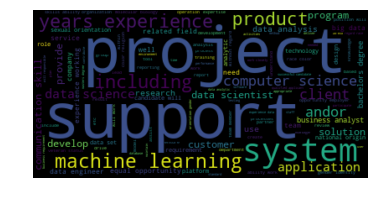

In [91]:
plt.imshow(ds_wc, interpolation='bilinear')
plt.axis("off")
plt.show()